<a href="https://colab.research.google.com/github/jugernaut/ProgramacionEnParalelo/blob/desarrollo/RedesNeuronales/02_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Perceptron</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Ángel Pérez León.

# Introducción

El perceptrón es un tipo de neurona artificial que fue inventada en 1957 por Frank Rosenblatt.

Las principales diferencias con respecto a las neuronas vistas previamente es que el perceptrón es capaz de aprender (machine learning) y además su valores de entrada y de salida son binarios. Aunque no es complicado modificar el modelo para tratar con campos no binarios.


## El cerebro humano

El cerebro humano es mucho muy complejo, al grado de que hoy en día no se conoce por completo su funcionamiento.

Sin embargo una de las características mas importantes del mismo y que forman parte esencial de lo que veremos más adelante, es que, el cerebro humano **aprende de la experiencia**.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/raton.png?raw=1" width="700">
</center>


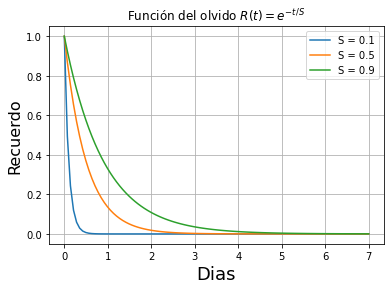

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0, 7, 100)    # Codominio de la función, de 0 a 7 con 100 puntos
# t=tiemo, S=intensidad del recuerdo
R = lambda t, S: np.exp(-t/S) # Definición de la función del olvido

# Definimos algunos parámetros para la gráfica
plt.title('Función del olvido $R(t) = e^{-t/S}$')

# Realizamos tres gráficas para S=0.1, S=0.5 y S=0.9] de la curva del olvido
for S in [0.1, 0.5, 0.9]:
    plt.plot(t, R(t, S),label="S = "+str(S))

# Mostramos la leyenda de las gráficas
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Recuerdo', fontsize=16)
plt.grid()
plt.legend()
plt.show()

Para un ejemplo más extenso de la función del olvido, revisar este [jupyter](https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/01_Calculo/04_Derivadas/01_Derivadas.ipynb).

## Neurona

Igual que sucede con el cerebro humano, **la neurona artificial es la unidad de toda red neuronal artificial** (R.N.A.) y se comportan de manera muy similar a sus análogas biológicas.

Una neurona artificial responde a las señales que recibe, y envía información en forma de señales a otras neuronas dentro de la red.

En este jupyter vamos a analizar el funcionamiento particular de una neurona, sin embargo el verdadero poder de las neuronas radica en organizarse y formar redes neuronales.

## Sinapsis

Dentro de una red neuronal biológica la sinapsis es la forma en la cual se establecen **vías de comunicación** entre las neuronas dentro de una red neuronal.

En una red neuronal artificial, es necesario simular estas vías de comunicación y este proceso se lleva a cabo mediante expresiones matemáticas que finalmente se traducen en **algoritmos computacionales**.


## Red Neuronal

Cada vez que aprendes un nuevo juego, un nuevo baile o alguna nueva habilidad matemática, algunas neuronas fortalecen sus conexiones entre si y debilitan algunas otras conexiones.

Es decir que la estructura de **la red neuronal evoluciona** a medida en que se aprenden nuevas habilidades.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/barton.jpg?raw=1" width="450">
</center>

## Red Neuronal Artificial

Como ya te puedes imaginar, una red neuronal artificial consiste en un conjunto de neuronas artificiales que interactúan entre si para **lograr un objetivo**.

El concepto de red neuronal artificial data de mediados del siglo pasado e incluso llego a estancarse en una época conocida como **la era de hielo de las redes neuronales artificiales**.

Sin embargo con la mejora en los algoritmos empleados en las redes neuronales artificiales y las mejoras en el hardware que implementan dichas redes, hoy en día se les dan usos tan variados que van desde, **clasificación automatizada**, modelos predictivos, medicina, y en general automatización de procesos.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/ia.png?raw=1" width="450">
</center>

#  Anatomía del Perceptrón

Todos los elementos vistos previamente se mantienen.

*   **Entradas**
*   **Pesos**
*   **Sesgo**
*   **Función de activación**

Aunque para el caso particular del perceptrón, la función de activavción será la conocida como paso binario y es tan sencilla como la siguiente imagen.

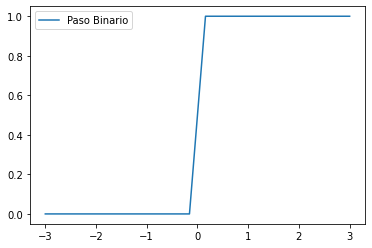

In [9]:
# se importan algunas funciones importantes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
# dominio de las graficas
x = np.linspace(-3, 3, 20)

# funciones comunes de activasion
PasoBinario = lambda x: np.heaviside(x,1)

# Definimos algunos parámetros para la gráfica
plt.plot(x, PasoBinario(x),label="Paso Binario")
plt.legend()

# Mostramos la leyenda de las gráficas
plt.show()

Es decir.

$$f\left(x\right)=\begin{cases}
1 \quad si & x\gt0\\
0 \quad e.o.c. & x\leq1
\end{cases}$$

En el contexto de las redes neuronales podemos pensar en esta función de la siguiente manera.

$$f\left(x\right)=\begin{cases}
1 \quad si & x\gt0\\
0 \quad e.o.c. & x\leq1
\end{cases}$$

## Ejemplo

Imaginemos que tenemos 3 datos que nos interesan ser procesados por nuestra neurona, estos datos pueden ser tan distintos como el valor de una empresa en la bolsa de valores, la probabilidad de que llueva, o cualquier dato que sea relevante para el caso en cuestión. 


In [ ]:
# se importan las bibliotecas necesarias
from IPython.html.widgets import interact
import ipywidgets as widgets

# neurona básica que solo recibe 3 parametros y los suma
def neurona1(x1, x2, x3):
    # se imprime la suma de las 3 señales de entrada
    print(x1+x2+x3) 

# interactivo 
interact(neurona1, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona1>

# Pesos (Weight) y Sesgo (Bias)

Los pesos son un elemento importante dentro de toda red neuronal artificial, ya que indican que tan fuerte o débil debe ser la conexión entre la neurona y las señales de entrada.

Imaginemos que se quiere usar una neurona artificial para determinar si es buena idea invertir en una empresa dedicada al desarrollo de microprocesadores.

Las entradas que recibiría nuestra neurona seguirían siendo las 3 variables antes mencionadas $(x_1, x_2, x_3)$, pero en este caso estos valores representan:

*   $x_1:$ valor del oro en la bolsa de valores.
*   $x_2:$ cotización en la ultima semana de dicha empresa.
*   $x_3:$ probabilidad de lluvia.

**Pesos**: ahora nos interesa modelar que el valor del oro tiene una mayor relevancia en la fabricación de un microporocesador que la probabilidad de lluvia y de la misma manera la cotización de la empresa en la última semana. Por lo que los pesos para cada señal de entrada serían:

*   $w_1:$ relevancia del valor del oro.
*   $w_2:$ relevancia de la cotización de la empresa.
*   $w_3:$ relevancia de probabilidad de lluvia.

**Sesgo (Bias)**: el sesgo es un valor (normalmente llamado $b$) que ayuda a modificar la suma ponderada de las señales de entrada. De tal manera que este sesgo permite modificar la salida de la función de activación. 




In [ ]:
'''
  x1: valor del oro
  x2: cotizacion de la empresa
  x3: probabilidad de lluvia
'''
def neurona2(x1, x2, x3):
    # sesgo
    b = -2.0
    # suma ponderada
    suma = x1*0.9+x2*0.6+x3*.02
    # se imprime el resultado
    print(b+suma) 

# interactivo 
interact(neurona2, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona2>

# Función de Activación

Diremos que una neurona se activa cuando transmite y establece una conexión con el resto de las neuronas, en otro caso la neurona permanece desactivada y por lo tanto no transmite señales al resto de las neuronas.

La función de activación es el equivalente biológico a la forma en la cuál una neurona **determina si se activa o permanece desactivada**.

A continuación veremos algunos ejemplos de funciones de activación.

### Tipos de funciones de activación


<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/funcionesact.png?raw=1" width="650">
</center>

In [ ]:
'''
  x1: valor del oro
  x2: cotizacion de la empresa
  x3: probabilidad de lluvia
'''
def neurona3(x1, x2, x3):
    # sesgo
    b = -2.0
    # suma ponderada
    suma = x1*0.9+x2*0.6+x3*.02
    evaluacion = suma+b
    # funcion de activacion
    relu = lambda x: np.maximum(0,x)
    # veamos si se activa la neurona
    if relu(evaluacion) > 0:
        print("¡¡¡Se activa la neurona!!!")
    else:
        print("No se activa la neurona :(")
        
# interactivo 
interact(neurona3, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona3>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/perceptron1.gif?raw=1" width="550">
</center>

# Aprendizaje

Bueno hasta este momento ya conocemos los elementos que integran una neurona artificial, elementos como:

*   **Entradas**: valores $(x_1, x_2,...,x_n)$ que entran en la neurona.
*   **Pesos**: son valores $(w_1, w_2,...,w_n)$ que ayudan a determinar que "tan relevante" es cada una de las entradas.
*   **Sesgo**: podemos pensar en este valor como un limite que la suma ponderada tiene que rebasar para que la neurona se active.
*   **Función de activación**: esta función "comprime" la suma ponderada de entradas, pesos y sesgo y nos ayuda a determinar la intensidad de la activación de la neurona en cuestión.

Pero surgen preguntas como, ¿en que momento una neurona artificial lleva a cabo el **proceso de aprendizaje**?, ¿como es que una red neuronal artificial lleva a cabo tareas tan complejas como **reconocer imágenes** o **identificar los gustos de un usuario de facebook**?.

La respuesta corta a estas preguntas es **PERCEPTRON** y **PERCEPTRON MULTICAPA** (red neuronal artificial).

En esencia un perceptrón es una neurona artificial capaz de "aprender" y un perceptrón multicapa, son muchas neuronas artificiales capaces de aprender conectadas unas con otras, igual que sucede con el cerebro humano.




#  Referencias

*   [Prometeo](https://github.com/jugernaut/Prometeo)
*   [Perceptron](https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3)
*   [Brilliant](https://brilliant.org/practice/intelligent-computers-menace/?chapter=introduction-to-neural-networks)
*   [Simulador](https://ml4a.github.io/ml4a/es/neural_networks/)
*   [NetLogo](https://ccl.northwestern.edu/netlogo/)
*   [Red neuronal desde cero](https://futurelab.mx/redes%20neuronales/inteligencia%20artificial/2019/06/25/intro-a-redes-neuronales-pt-1/)
*   [Libro Web](http://neuralnetworksanddeeplearning.com/index.html)
*   [Aprendizaje profundo](https://www.deeplearningbook.org/)
*   [Lista de videos](https://www.youtube.com/playlist?list=PLo8YL3HL50lUHQS80oE_ypxFi0Y3uCVal)
*   [Algebra Lineal](https://www.youtube.com/playlist?list=PLIb_io8a5NB2DddFf-PwvZDCOUNT1GZoA)
